In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from Utils import estimate_mask_inv, monte_carlo

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
root = 'sequences-train/'
name = 'swan' # name of the sequence : bag, bear, book, camel, rhino, swan
im_begin, im_end = 1, 26 # reference image (1) and last image (varies depending on the sequence)

In [5]:
ref = io.imread(root + name + '-%0*d.bmp'%(3,1))
img = io.imread(root + name + '-%0*d.bmp'%(3,2))
ref_mask = io.imread(root + name + '-%0*d.png'%(3,1))
img_mask = io.imread(root + name + '-%0*d.png'%(3,2))

In [17]:
temp = monte_carlo(img, ref, 10, p_size=11)

  0%|          | 0/10 [00:00<?, ?it/s]

In [18]:
print(temp[0, :3, :3, :])

[[[128 294]
  [128 295]
  [128 295]]

 [[128 295]
  [128 295]
  [128 295]]

 [[129 293]
  [129 295]
  [129 296]]]


In [19]:
print(temp[2, :3, :3, :])

[[[112 336]
  [112 336]
  [114 340]]

 [[115 337]
  [115 337]
  [113 339]]

 [[ 15  29]
  [115 337]
  [115 338]]]


In [20]:
res = np.zeros((240, 427, 10))
print(temp[0, :, :, :].shape)
for k in range(10):
    res[:,:,k] = estimate_mask_inv(ref_mask, temp[k, :, :, :])


(240, 427, 2)


In [21]:
def thresholding(res, threshold=3):
    temp = np.zeros((240, 427))
    for k in range(240):
        for l in range(427):
            if np.sum(res[k,l,:]) >= threshold*255:
                temp[k, l] = 255
    return temp


In [34]:
esti_mask = thresholding(res, threshold=8)

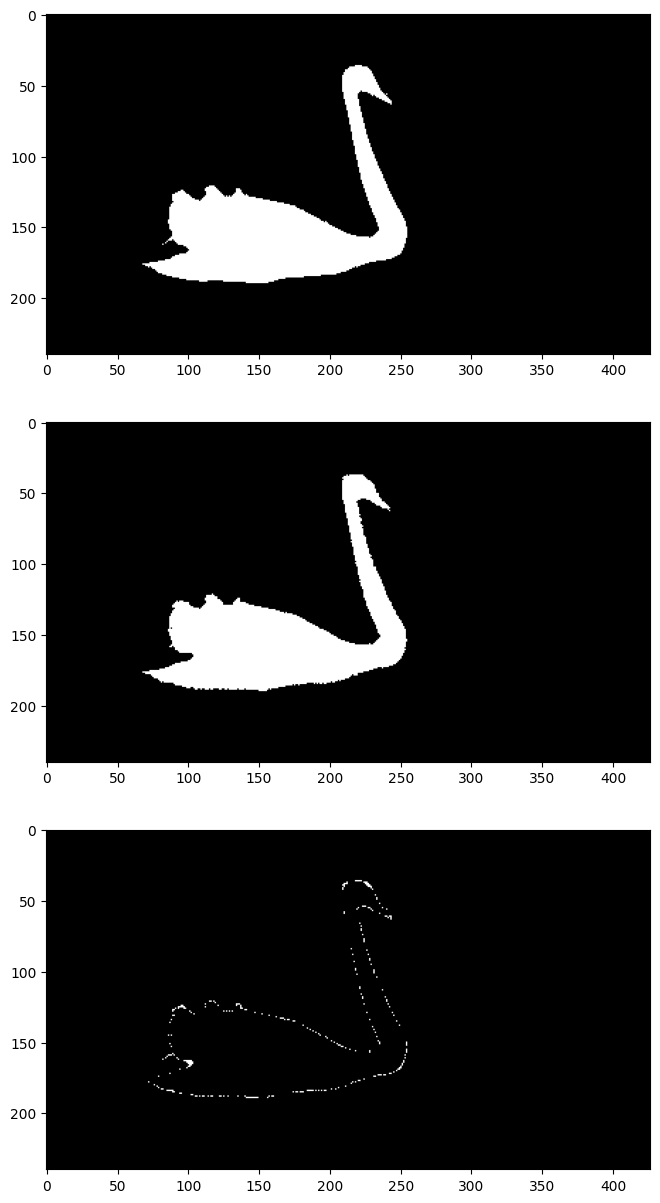

In [35]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

axs[0].imshow(img_mask, cmap="gray")
axs[1].imshow(esti_mask, cmap="gray")
axs[2].imshow(np.abs(img_mask-esti_mask), cmap="gray")
plt.show()

In [36]:
def mask_on_image(img, mask):
    temp = np.copy(img)
    temp1 = 255 * np.ones((240, 427, 3))
    temp[mask==255] = np.array([255, 255, 255])
    temp1[mask==255,:] = img[mask==255,:]
    return temp, temp1.astype(np.uint8)

In [41]:
t1, t2 = mask_on_image(img, esti_mask)
t3, t4 = mask_on_image(img, img_mask)

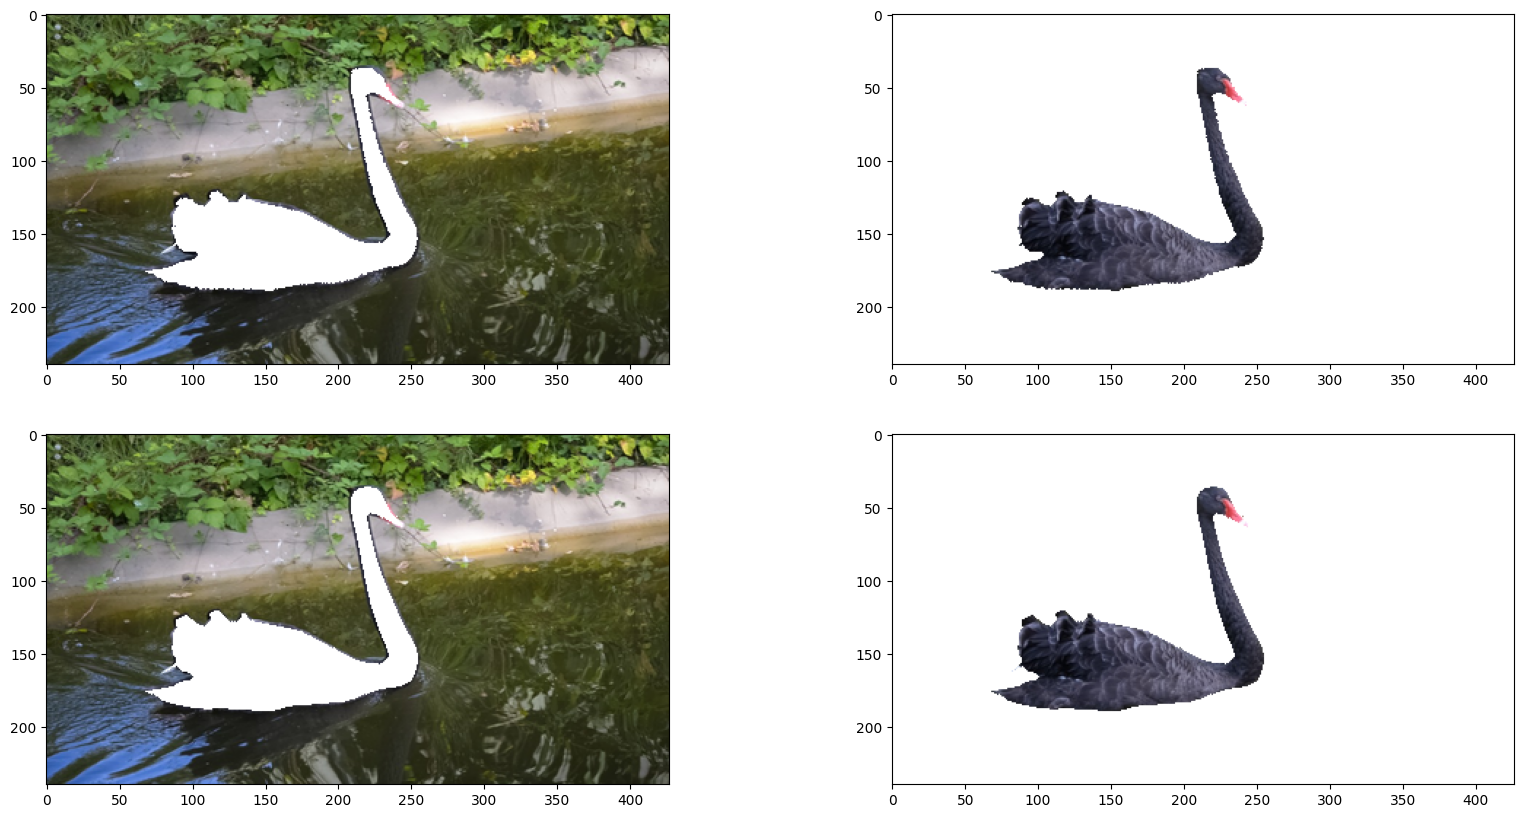

In [46]:
fig, axs = plt.subplots(2, 2,  figsize=(20,10))
axs[0, 0].imshow(t1)
axs[0, 1].imshow(t2)
axs[1, 0].imshow(t3)
axs[1, 1].imshow(t4)
plt.show()
